In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('script/final.csv', low_memory=False)

In [3]:
category_counts = df['category'].value_counts()
print(category_counts)
subcategory_counts = df['subcategory '].value_counts()
print(subcategory_counts)

DoS               60000
Reconnaissance    40000
DDoS              40000
Normal             6934
Theft              1587
Name: category, dtype: int64
OS_Fingerprint       20000
Service_Scan         20000
TCP DoS              20000
HTTP DoS             20000
UDP DoS              20000
TCP DDoS             20000
UDP DDoS             20000
Normal                6934
Keylogging            1469
Data_Exfiltration      118
Name: subcategory , dtype: int64


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148521 entries, 0 to 148520
Data columns (total 35 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   pkSeqID       148521 non-null  int64  
 1   stime         148521 non-null  float64
 2   flgs          148521 non-null  object 
 3   proto         148521 non-null  object 
 4   saddr         148521 non-null  object 
 5   sport         148079 non-null  object 
 6   daddr         148521 non-null  object 
 7   dport         148079 non-null  object 
 8   pkts          148521 non-null  int64  
 9   bytes         148521 non-null  int64  
 10  state         148521 non-null  object 
 11  ltime         148521 non-null  float64
 12  seq           148521 non-null  int64  
 13  dur           148521 non-null  float64
 14  mean          148521 non-null  float64
 15  stddev        148521 non-null  float64
 16  smac          0 non-null       float64
 17  dmac          0 non-null       float64
 18  sum 

In [5]:
df.dropna(inplace=True, how='all', axis=1)

In [6]:
df.dropna(inplace=True, how='any', axis=0)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148079 entries, 0 to 148520
Data columns (total 29 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   pkSeqID       148079 non-null  int64  
 1   stime         148079 non-null  float64
 2   flgs          148079 non-null  object 
 3   proto         148079 non-null  object 
 4   saddr         148079 non-null  object 
 5   sport         148079 non-null  object 
 6   daddr         148079 non-null  object 
 7   dport         148079 non-null  object 
 8   pkts          148079 non-null  int64  
 9   bytes         148079 non-null  int64  
 10  state         148079 non-null  object 
 11  ltime         148079 non-null  float64
 12  seq           148079 non-null  int64  
 13  dur           148079 non-null  float64
 14  mean          148079 non-null  float64
 15  stddev        148079 non-null  float64
 16  sum           148079 non-null  float64
 17  min           148079 non-null  float64
 18  max 

In [8]:
df.tail()

,pkSeqID,stime,flgs,proto,saddr,sport,daddr,dport,pkts,bytes,...,spkts,dpkts,sbytes,dbytes,rate,srate,drate,attack,category,subcategory
148516,64198387,1.528100e+09,e,udp,192.168.100.147,39218,192.168.100.5,80,10,600,...,10,0,600,0,0.254356,0.254356,0.0,1,DDoS,UDP DDoS
148517,64816502,1.528100e+09,e,udp,192.168.100.148,61312,192.168.100.5,80,2,120,...,2,0,120,0,0.378627,0.378627,0.0,1,DDoS,UDP DDoS
148518,64593632,1.528100e+09,e,udp,192.168.100.150,65102.0,192.168.100.5,80.0,10,600,...,10,0,600,0,0.291402,0.291402,0.0,1,DDoS,UDP DDoS
148519,64253089,1.528100e+09,e,udp,192.168.100.147,62704,192.168.100.5,80,10,600,...,10,0,600,0,0.296472,0.296472,0.0,1,DDoS,UDP DDoS
148520,64880038,1.528100e+09,e,udp,192.168.100.149,17388,192.168.100.5,80,1,60,...,1,0,60,0,0.000000,0.000000,0.0,1,DDoS,UDP DDoS


In [9]:
object_columns = df.select_dtypes(include='object').columns.tolist()
print(object_columns)


['flgs', 'proto', 'saddr', 'sport', 'daddr', 'dport', 'state', 'category', 'subcategory ']


In [10]:
encoder = LabelEncoder()

selected_cols = ['flgs', 'proto', 'saddr', 'sport', 'daddr', 'dport', 'state', 'category', 'subcategory ']
encoded_df = df.copy()

for col in selected_cols:
    encoded_df[col] = encoder.fit_transform(encoded_df[col])

df_encoded = encoded_df.drop(selected_cols, axis=1)

In [11]:
matrix = encoded_df.corr()
matrix

,pkSeqID,stime,flgs,proto,saddr,sport,daddr,dport,pkts,bytes,...,spkts,dpkts,sbytes,dbytes,rate,srate,drate,attack,category,subcategory
pkSeqID,1.000000,0.470698,0.150429,0.498860,-0.085759,-0.107341,-0.062957,0.390937,-0.024386,-0.014468,...,-0.025696,-0.016606,-0.017896,-0.007610,-0.105768,-0.062936,-0.093811,0.163432,-0.753861,0.553308
stime,0.470698,1.000000,0.360624,0.229025,-0.181429,-0.168296,-0.163220,0.646729,-0.018967,0.004697,...,-0.027301,-0.003057,-0.009685,0.010720,-0.172005,-0.074104,-0.113512,0.318215,-0.769548,0.288610
flgs,0.150429,0.360624,1.000000,-0.381437,-0.146483,-0.231622,-0.026523,0.310146,-0.006737,0.001950,...,-0.011713,0.001631,-0.002486,0.003634,-0.087045,-0.050445,-0.075260,0.129320,-0.417717,0.203159
proto,0.498860,0.229025,-0.381437,1.000000,0.135037,-0.039397,0.166214,0.275644,0.003965,-0.001833,...,0.005960,0.000299,0.000603,-0.002493,-0.093156,-0.039396,-0.081162,-0.275620,-0.368723,0.581889
saddr,-0.085759,-0.181429,-0.146483,0.135037,1.000000,0.020102,0.093198,-0.135778,0.090324,0.044677,...,0.103916,0.049732,0.067932,0.016755,-0.009078,-0.011806,-0.023402,-0.556847,0.140286,-0.138165
sport,-0.107341,-0.168296,-0.231622,-0.039397,0.020102,1.000000,0.012877,-0.118744,0.024619,0.012719,...,0.025819,0.016932,0.018772,0.005072,0.033501,0.026631,0.039790,-0.038301,0.177306,-0.255985
daddr,-0.062957,-0.163220,-0.026523,0.166214,0.093198,0.012877,1.000000,-0.039425,-0.005814,-0.003723,...,-0.006388,-0.003606,-0.004386,-0.002075,-0.028129,0.039277,-0.030623,-0.606127,0.025206,-0.104813
dport,0.390937,0.646729,0.310146,0.275644,-0.135778,-0.118744,-0.039425,1.000000,0.003178,-0.001557,...,0.001065,0.005244,-0.001522,-0.001034,-0.156538,-0.029861,-0.073173,0.107307,-0.702937,0.275986
pkts,-0.024386,-0.018967,-0.006737,0.003965,0.090324,0.024619,-0.005814,0.003178,1.000000,0.715828,...,0.923680,0.856300,0.658133,0.497546,-0.004594,-0.002332,-0.003342,-0.139233,0.020670,-0.034819
bytes,-0.014468,0.004697,0.001950,-0.001833,0.044677,0.012719,-0.003723,-0.001557,0.715828,1.000000,...,0.530994,0.788468,0.544348,0.894736,-0.002624,-0.001384,-0.001757,-0.061612,0.020023,-0.025949


In [12]:
category_correlations = matrix['category']

# Sort the correlations to find the top 6 correlated columns
top_correlated_columns = category_correlations.abs().sort_values(ascending=False)[1:15]

print("Top 6 correlated columns with 'category' column:")
print(top_correlated_columns)

Top 6 correlated columns with 'category' column:
ltime           0.769554
stime           0.769548
pkSeqID         0.753861
dport           0.702937
max             0.615638
mean            0.531884
stddev          0.491190
flgs            0.417717
subcategory     0.404453
state           0.400436
proto           0.368723
min             0.291825
rate            0.191379
seq             0.181416
Name: category, dtype: float64


In [13]:
category_correlations = matrix['subcategory ']

# Sort the correlations to find the top 6 correlated columns
top_correlated_columns = category_correlations.abs().sort_values(ascending=False)[1:15]

print("Top 6 correlated columns with 'category' column:")
print(top_correlated_columns)

Top 6 correlated columns with 'category' column:
proto       0.581889
max         0.557022
pkSeqID     0.553308
mean        0.521344
seq         0.468125
stddev      0.427780
state       0.423896
category    0.404453
stime       0.288610
ltime       0.288598
dport       0.275986
min         0.267334
sport       0.255985
attack      0.218108
Name: subcategory , dtype: float64


In [14]:
df['subcategory '].unique()

array(['OS_Fingerprint', 'Service_Scan', 'Normal', 'TCP DoS', 'HTTP DoS',
       'Keylogging', 'Data_Exfiltration', 'UDP DoS', 'TCP DDoS',
       'UDP DDoS'], dtype=object)

In [15]:
subcategory_counts = df['subcategory '].value_counts()
print(subcategory_counts)

TCP DoS              20000
UDP DoS              20000
UDP DDoS             20000
Service_Scan         19998
TCP DDoS             19998
OS_Fingerprint       19992
HTTP DoS             19985
Normal                6528
Keylogging            1463
Data_Exfiltration      115
Name: subcategory , dtype: int64


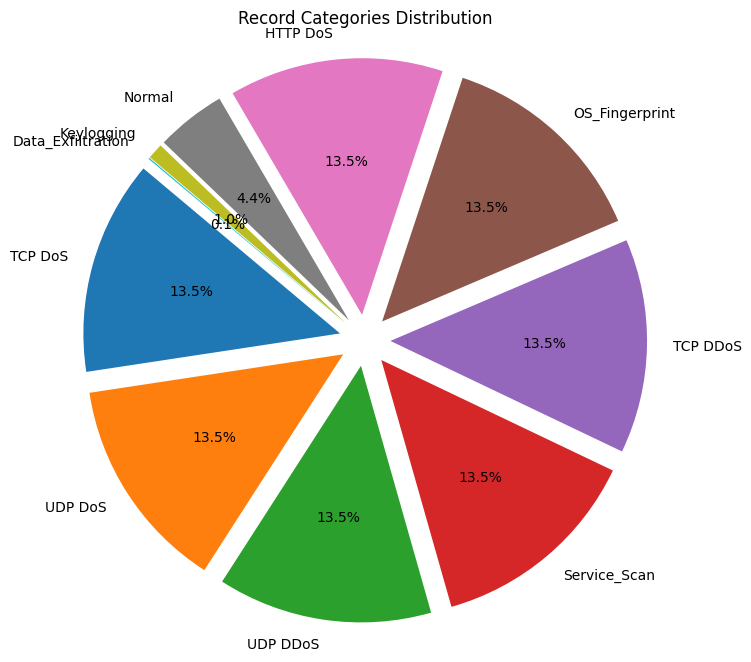

In [17]:
value_counts = df['subcategory '].value_counts()

def calculate_explode(values, threshold=0.05, max_explode=0.1):
    explode_values = []
    total_values = values.sum()
    for value in values:
        if value / total_values > threshold:
            explode_values.append(max_explode)
        else:
            explode_values.append(0)
    return explode_values

# Calculate explode values
explode = calculate_explode(value_counts)

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140, explode=explode)
plt.title('Record Categories Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()